In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
arr = os.listdir('results')
account_value_trade = [c for c in arr if 'account_value_trade' in c]
account_date_trade = [c for c in arr if 'account_date_trade' in c]
models = [
    'a2c',
    'ddpg',
    'ppo',
    'ensemble'
]
index_list = list(set([c.split('_')[-1].split('.')[0] for c in account_value_trade]))
index_list = sorted(index_list, key=lambda d: int(d)) 

In [46]:
def joinDatesAndValues(account_date_trade, account_value_trade, column_name):
    account_date_trade = pd.read_csv(account_date_trade)
    account_value_trade = pd.read_csv(account_value_trade)
    df=pd.concat([account_date_trade['0'],account_value_trade['0']],axis=1)
    df.columns = ['date',column_name]
    return df
def mergeDataframes(df_list, column):
    df = pd.concat(df_list, axis=0)
    df = df.dropna(subset=[column])
    df = df.sort_values(by=[column])
    return df
def joinDataframes(index):
    df_list = []
    for m in models:
        account_date_trade = 'results/account_date_trade_{}_{}.csv'.format(m, index)
        account_value_trade = 'results/account_value_trade_{}_{}.csv'.format(m, index)
        df = joinDatesAndValues(account_date_trade, account_value_trade, m)
        df_list.append(df)
    return mergeDataframes(df_list, 'date')

<Axes: xlabel='date'>

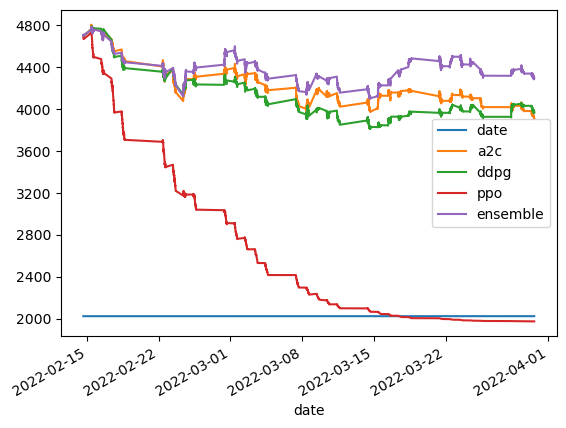

In [47]:
data = []
for i in index_list:
    df = joinDataframes(i)
    lf = list(df.index.unique().values)

    for l in lf:
        dfTemp = df.loc[l,:]
        d = {}
        d['date'] = dfTemp.date.values[0]
        for c in dfTemp.columns:
            d[c] = dfTemp[c].max()
        data.append(d)
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df["date"])
df.index = df['date'] 
df.plot()

In [48]:
df.to_csv('ValuePortfolio.csv')

In [49]:
def convertir_a_numerico(valor):
    # Remplaza las comas por puntos
    valor = valor.replace('.', '')
    valor = valor.replace(',', '.')
    # Verifica si el valor termina con 'M'
    if valor.endswith('M'):
        valor = valor[:-1]  # Elimina la 'M' del final
        valor = float(valor) * 1e6  # Convierte a millones
    else:
        valor = float(valor)  # Convierte a float
    return valor


In [50]:
import io
# Define la ruta al archivo CSV
ruta = 'C:/Users/oscar/Desktop/TesisPaula/Dow_Jones.csv'

# Abre el archivo y lee los datos
with open(ruta, 'r', encoding='ISO-8859-1') as f:
    data = f.read()

# Reemplaza las dobles comillas por comillas simples
data = data.replace('"",""','","')
data = data.replace(',""', '","')
data = data.replace('"""', '"')
#data = data.replace('¿', '')

# Convierte el texto a un objeto StringIO
data_io = io.StringIO(data)

#print(data_io.getvalue())

df_io = pd.read_csv(data_io, sep=",")
df_io.columns = ["date", "close", "open", "max", "min", "volume", "%var"]

# Supongamos que 'Fecha' es el nombre de tu columna de fechas
df_io['date'] = pd.to_datetime(df_io['date'], format='%d.%m.%Y')


cols = ['close', 'open', 'max', 'min', 'volume']
df_io[cols] = df_io[cols].applymap(convertir_a_numerico)


df_io

,date,close,open,max,min,volume,%var
0,2022-12-30,33147.28,33121.61,33149.56,32848.07,279970000.0,"-0,22%"
1,2022-12-29,33221.06,33021.43,33292.97,33021.43,236930000.0,"1,05%"
2,2022-12-28,32875.01,33264.76,33377.35,32872.15,247020000.0,"-1,10%"
3,2022-12-27,33241.69,33271.90,33387.12,33069.58,235960000.0,"0,11%"
4,2022-12-23,33204.26,32961.06,33225.83,32815.26,218350000.0,"0,53%"
...,...,...,...,...,...,...,...
310,2021-10-07,34754.94,34509.72,34975.19,34509.72,277050000.0,"0,98%"
311,2021-10-06,34416.99,34198.96,34432.68,33854.69,323370000.0,"0,30%"
312,2021-10-05,34314.67,34035.25,34490.95,34035.25,312430000.0,"0,92%"
313,2021-10-04,34002.92,34312.96,34410.28,33821.58,400190000.0,"-0,94%"


In [51]:
df

,date,a2c,ddpg,ppo,ensemble
date,,,,,
2022-02-14 15:32:00,2022-02-14 15:32:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2022-02-14 15:33:00,2022-02-14 15:33:00,9.999225e+05,9.997918e+05,1.000299e+06,9.997918e+05
2022-02-14 15:34:00,2022-02-14 15:34:00,1.000194e+06,1.000610e+06,1.000036e+06,1.000610e+06
2022-02-14 15:35:00,2022-02-14 15:35:00,1.000562e+06,1.001020e+06,1.000532e+06,1.001020e+06
2022-02-14 15:36:00,2022-02-14 15:36:00,9.995846e+05,1.000571e+06,9.987667e+05,1.000571e+06
...,...,...,...,...,...
2022-03-30 15:27:00,2022-03-30 15:27:00,7.074902e+05,7.299219e+05,9.298576e+02,8.495172e+05
2022-03-30 15:28:00,2022-03-30 15:28:00,7.077781e+05,7.301186e+05,9.301176e+02,8.496471e+05
2022-03-30 15:29:00,2022-03-30 15:29:00,7.078407e+05,7.300449e+05,9.305027e+02,8.494970e+05


In [52]:
import pandas as pd

# Asegúrate de que 'date' sea datetime y establece 'date' como índice
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df_io['date'] = pd.to_datetime(df_io['date'])
df_io.set_index('date', inplace=True)

# Ordena los dataframes por 'date'
df.sort_index(inplace=True)
df_io.sort_index(inplace=True)

# Realiza el merge_asof
df_final = pd.merge_asof(df, df_io['close'].rename('dow_jones'), left_index=True, right_index=True, direction='forward')

print(df_final)

                              a2c          ddpg           ppo      ensemble  \
date                                                                          
2022-02-14 15:32:00  1.000000e+06  1.000000e+06  1.000000e+06  1.000000e+06   
2022-02-14 15:33:00  9.999225e+05  9.997918e+05  1.000299e+06  9.997918e+05   
2022-02-14 15:34:00  1.000194e+06  1.000610e+06  1.000036e+06  1.000610e+06   
2022-02-14 15:35:00  1.000562e+06  1.001020e+06  1.000532e+06  1.001020e+06   
2022-02-14 15:36:00  9.995846e+05  1.000571e+06  9.987667e+05  1.000571e+06   
...                           ...           ...           ...           ...   
2022-03-30 15:27:00  7.074902e+05  7.299219e+05  9.298576e+02  8.495172e+05   
2022-03-30 15:28:00  7.077781e+05  7.301186e+05  9.301176e+02  8.496471e+05   
2022-03-30 15:29:00  7.078407e+05  7.300449e+05  9.305027e+02  8.494970e+05   
2022-03-30 15:30:00  7.080109e+05  7.301919e+05  9.271210e+02  8.495927e+05   
2022-03-30 15:31:00  7.087856e+05  7.308624e+05  9.2

In [53]:
def calculate_log_return(df, column):
    df[column+'_log_return'] = np.log(df[column]) - np.log(df[column].shift(1))
    df[column+'_cum_log_return'] = np.cumsum(df[column+'_log_return'])
    #del df[column+'_log_return']
    return df

In [54]:
for column in ['a2c', 'ddpg', 'ppo', 'ensemble', 'dow_jones']:
    df_final = calculate_log_return(df_final, column)
df_final

,a2c,ddpg,ppo,ensemble,dow_jones,a2c_log_return,a2c_cum_log_return,ddpg_log_return,ddpg_cum_log_return,ppo_log_return,ppo_cum_log_return,ensemble_log_return,ensemble_cum_log_return,dow_jones_log_return,dow_jones_cum_log_return
date,,,,,,,,,,,,,,,
2022-02-14 15:32:00,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,34988.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-14 15:33:00,9.999225e+05,9.997918e+05,1.000299e+06,9.997918e+05,34988.84,-0.000078,-0.000078,-0.000208,-0.000208,0.000299,0.000299,-0.000208,-0.000208,0.0,0.000000
2022-02-14 15:34:00,1.000194e+06,1.000610e+06,1.000036e+06,1.000610e+06,34988.84,0.000271,0.000194,0.000818,0.000610,-0.000263,0.000036,0.000818,0.000610,0.0,0.000000
2022-02-14 15:35:00,1.000562e+06,1.001020e+06,1.000532e+06,1.001020e+06,34988.84,0.000368,0.000562,0.000409,0.001019,0.000496,0.000531,0.000409,0.001019,0.0,0.000000
2022-02-14 15:36:00,9.995846e+05,1.000571e+06,9.987667e+05,1.000571e+06,34988.84,-0.000977,-0.000416,-0.000448,0.000571,-0.001766,-0.001234,-0.000448,0.000571,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30 15:27:00,7.074902e+05,7.299219e+05,9.298576e+02,8.495172e+05,34678.35,0.001656,-0.346032,0.000917,-0.314818,0.002056,-6.980479,0.000618,-0.163087,0.0,-0.008914
2022-03-30 15:28:00,7.077781e+05,7.301186e+05,9.301176e+02,8.496471e+05,34678.35,0.000407,-0.345625,0.000269,-0.314548,0.000280,-6.980200,0.000153,-0.162934,0.0,-0.008914
2022-03-30 15:29:00,7.078407e+05,7.300449e+05,9.305027e+02,8.494970e+05,34678.35,0.000088,-0.345536,-0.000101,-0.314649,0.000414,-6.979786,-0.000177,-0.163111,0.0,-0.008914


In [55]:
df_final = df_final.fillna(method='bfill')
df_final.isnull().sum()

a2c                         0
ddpg                        0
ppo                         0
ensemble                    0
dow_jones                   0
a2c_log_return              0
a2c_cum_log_return          0
ddpg_log_return             0
ddpg_cum_log_return         0
ppo_log_return              0
ppo_cum_log_return          0
ensemble_log_return         0
ensemble_cum_log_return     0
dow_jones_log_return        0
dow_jones_cum_log_return    0
dtype: int64

In [58]:
df_final.to_csv('ValuePortfolio.csv')

In [56]:
def filter_df(df):
    df = df.filter(regex='cum_log_return|datadate')
    #df = df.set_index('datadate')
    return df

In [14]:
df_merge_final = filter_df(df_final)
df_merge_final

,a2c_cum_log_return,ddpg_cum_log_return,ppo_cum_log_return,ensemble_cum_log_return,dow_jones_cum_log_return
date,,,,,
2022-02-14 15:32:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:33:00,-0.000078,-0.000208,0.000299,-0.000208,0.000000
2022-02-14 15:34:00,0.000194,0.000610,0.000036,0.000610,0.000000
2022-02-14 15:35:00,0.000562,0.001019,0.000531,0.001019,0.000000
2022-02-14 15:36:00,-0.000416,0.000571,-0.001234,0.000571,0.000000
...,...,...,...,...,...
2022-03-30 15:27:00,-0.346032,-0.314818,-6.980479,-0.163087,-0.008914
2022-03-30 15:28:00,-0.345625,-0.314548,-6.980200,-0.162934,-0.008914
2022-03-30 15:29:00,-0.345536,-0.314649,-6.979786,-0.163111,-0.008914


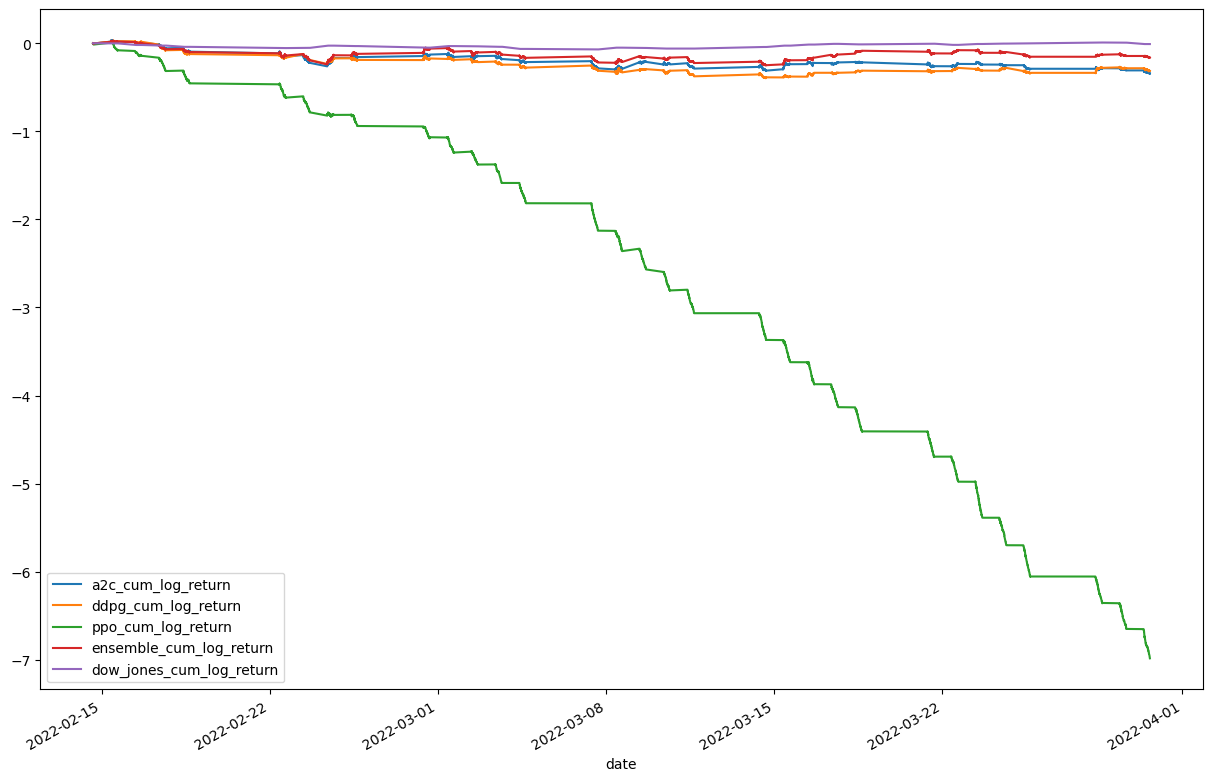

In [15]:
df_merge_final.plot(figsize=(15, 10))
plt.show()    

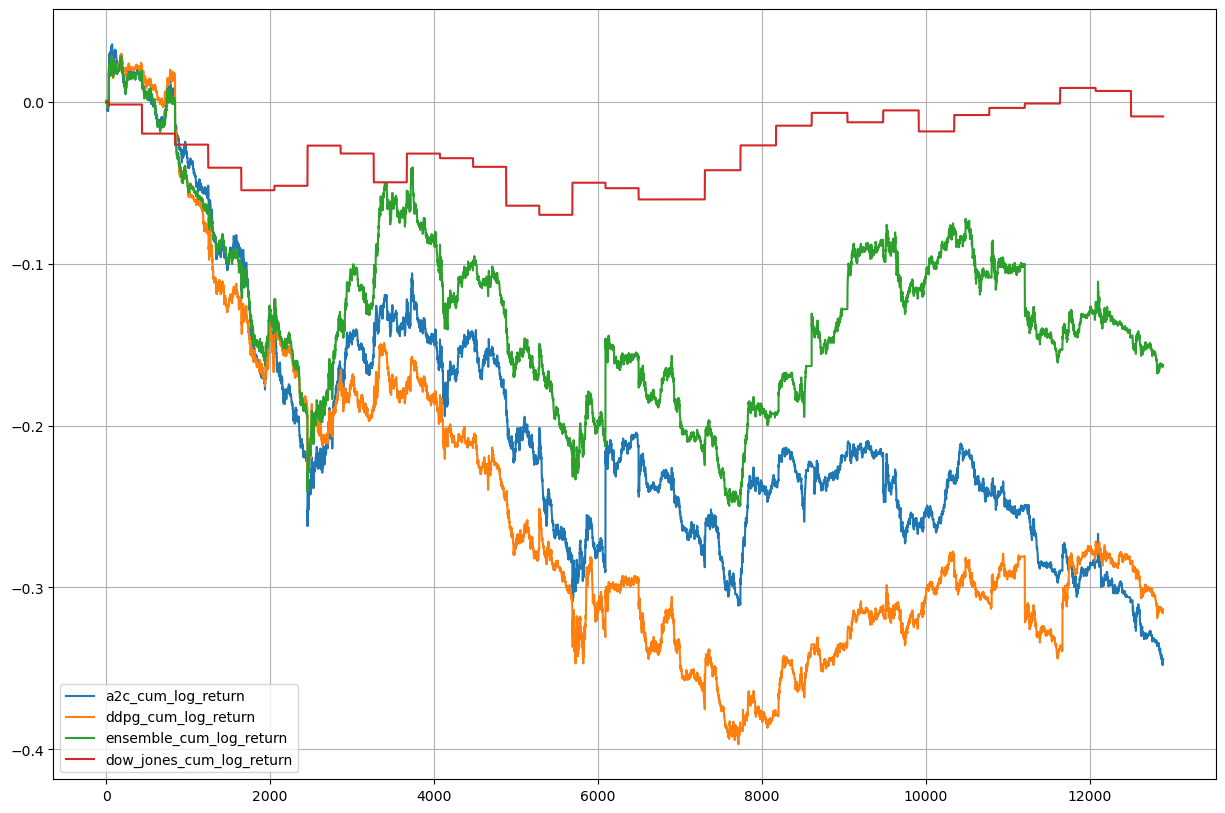

In [67]:
df_merge_final_temp = df_merge_final.sort_index()
df_merge_final_temp = df_merge_final_temp.reset_index()
df_merge_final_temp[["a2c_cum_log_return", "ddpg_cum_log_return", "ensemble_cum_log_return","dow_jones_cum_log_return"]].plot(figsize=(15, 10))
plt.grid()
plt.show() 

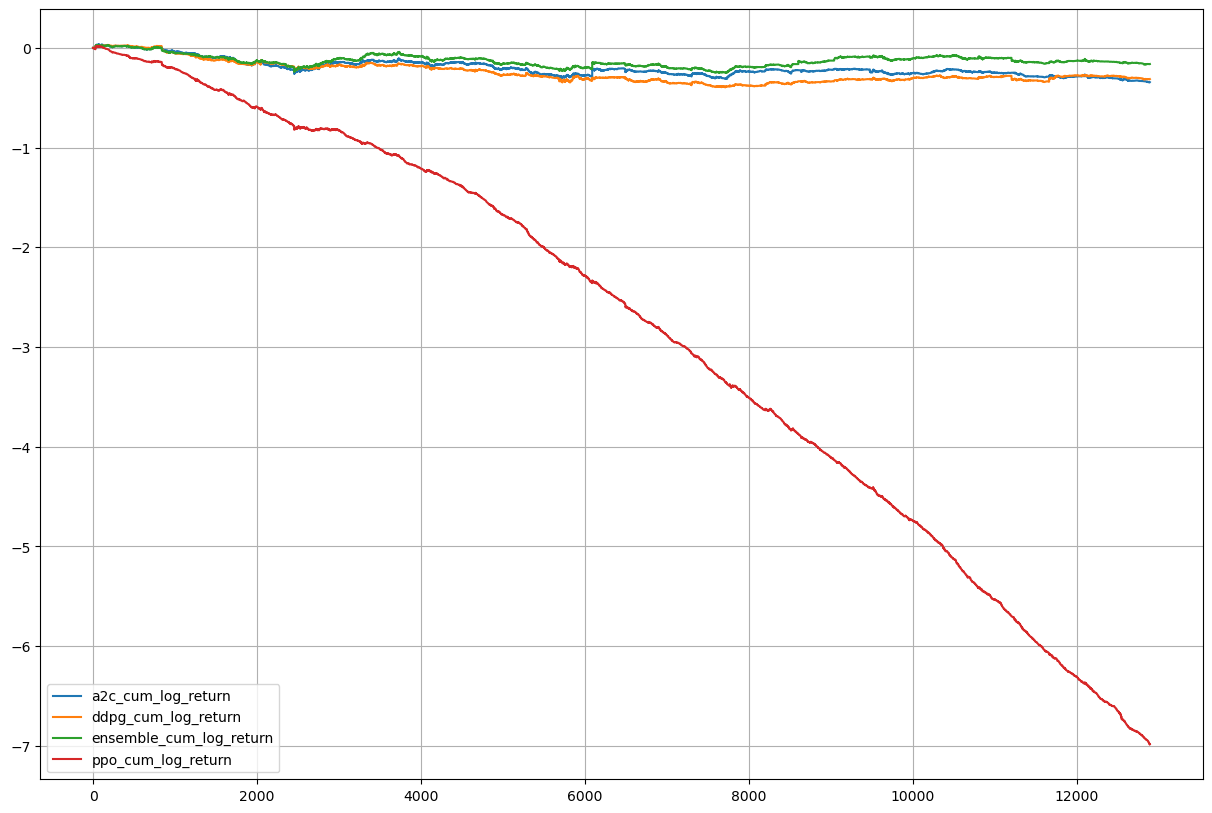

In [16]:
df_merge_final_temp = df_merge_final.sort_index()
df_merge_final_temp = df_merge_final_temp.reset_index()
df_merge_final_temp[["a2c_cum_log_return", "ddpg_cum_log_return", "ensemble_cum_log_return", "ppo_cum_log_return"]].plot(figsize=(15, 10))
plt.grid()
plt.show() 

In [ ]:
df_merge_final_temp = df_merge_final.sort_index()
df_merge_final_temp = df_merge_final_temp.reset_index()
df_merge_final_temp[["a2c_cum_log_return", "ddpg_cum_log_return", "ensemble_cum_log_return", "ppo_cum_log_return"]].plot(figsize=(15, 10))
plt.grid()
plt.show() 

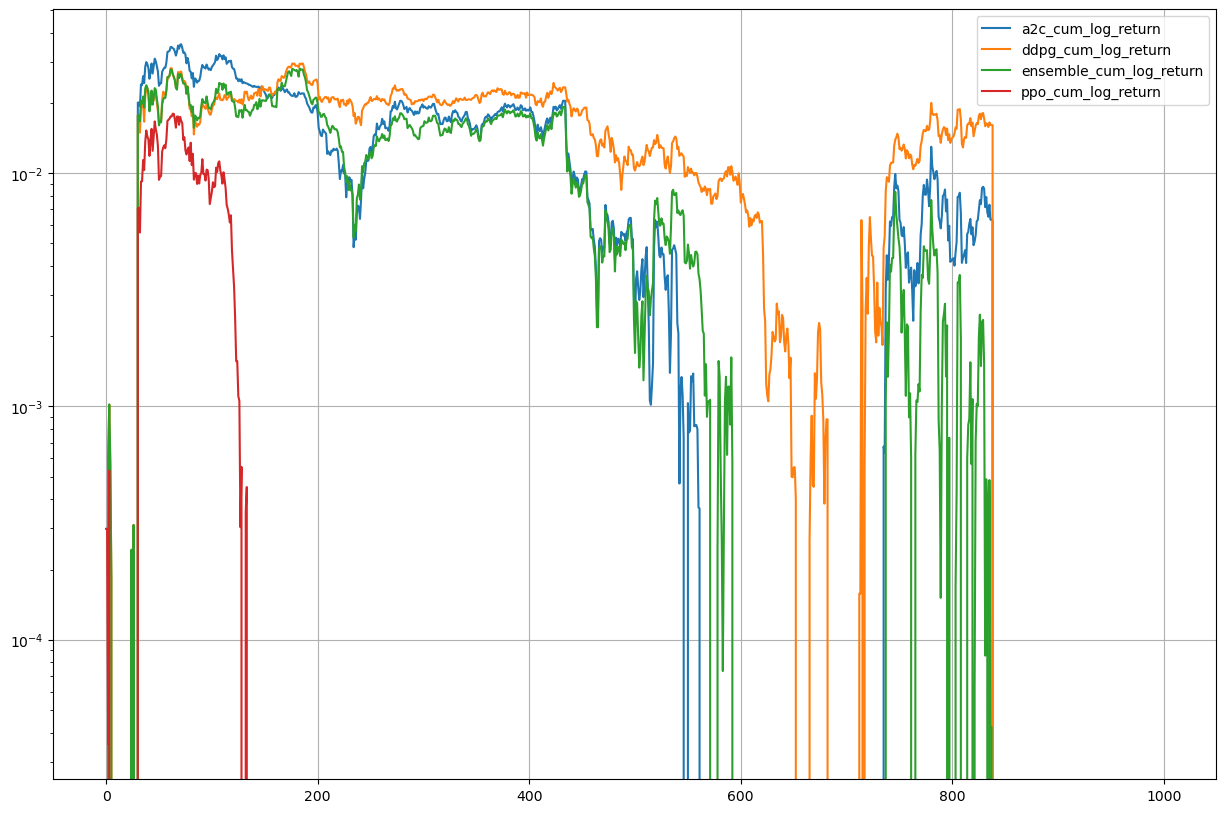

In [19]:
import matplotlib.pyplot as plt

df_merge_final_temp = df_merge_final.sort_index()
df_merge_final_temp = df_merge_final_temp.reset_index()

plt.figure(figsize=(15, 10))
plt.semilogy(df_merge_final_temp["a2c_cum_log_return"].head(1000), label="a2c_cum_log_return")
plt.semilogy(df_merge_final_temp["ddpg_cum_log_return"].head(1000), label="ddpg_cum_log_return")
plt.semilogy(df_merge_final_temp["ensemble_cum_log_return"].head(1000), label="ensemble_cum_log_return")
plt.semilogy(df_merge_final_temp["ppo_cum_log_return"].head(1000), label="ppo_cum_log_return")

plt.legend(loc='best')
plt.grid()
plt.show()


In [74]:
df_merge_final_temp.tail(1)

,date,a2c_cum_log_return,ddpg_cum_log_return,ppo_cum_log_return,ensemble_cum_log_return,dow_jones_cum_log_return
12895,2022-03-30 15:31:00,-0.344202,-0.31353,-6.984586,-0.162612,-0.008914


In [76]:
df_merge_final_temp.date.min(),df_merge_final_temp.date.max()

(Timestamp('2022-02-14 15:32:00'), Timestamp('2022-03-30 15:31:00'))

In [69]:
df_sharpe  = pd.read_csv('C:/Users/oscar/Desktop/TesisPaula/results/results_sharpe.csv')

In [70]:
df_sharpe

,Unnamed: 0,PPO,DDPG,A2C,Start,Stop,Model selected
0,0,-0.262654,-0.028816,-0.040635,2022-02-10 09:31:00,2022-02-14 16:30:00,DDPG
1,1,-0.142155,-0.003107,0.019077,2022-02-10 10:01:00,2022-02-15 10:00:00,A2C
2,2,-0.358632,-0.001199,-0.009101,2022-02-10 10:31:00,2022-02-15 10:30:00,DDPG
3,3,-0.496295,-0.022376,-0.003345,2022-02-10 11:01:00,2022-02-15 11:00:00,A2C
4,4,-0.410410,-0.024382,-0.036164,2022-02-10 11:31:00,2022-02-15 11:30:00,DDPG
...,...,...,...,...,...,...,...
411,411,-0.027524,0.077390,0.084565,2022-03-25 14:46:00,2022-03-30 13:30:00,A2C
412,412,0.005568,0.047439,0.065043,2022-03-25 15:16:00,2022-03-30 14:00:00,A2C
413,413,-0.038136,0.067003,0.048585,2022-03-25 15:46:00,2022-03-30 14:30:00,DDPG
414,414,-0.566930,0.033858,-0.003003,2022-03-28 09:14:00,2022-03-30 15:00:00,DDPG


In [71]:
df_sharpe.to_csv('C:/Users/oscar/Desktop/TesisPaula/results_sharpe.csv')